### Data preprocessing procedure

- Remove high-correlation
- Remove outlier by algorithm in preprocessing module

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import preprocessing as pr
from sklearn.preprocessing import MinMaxScaler,minmax_scale, MaxAbsScaler, RobustScaler, Normalizer, StandardScaler, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet
from scipy.stats import chi2
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [4]:
dir = r'C:\Users\jihoon.park\Desktop\Paper preparation\SimA_20230214\CSV file\Total(N1M1+N2M2)'
path = 'Before preprocessing'

In [104]:
# 파일에서 list안에 csv파일 불러오기
def file_open(dir, path):
    os.chdir(dir)
    os.chdir(os.path.join(dir,path))
    filelist = os.listdir()
    filepath = [os.path.join(os.getcwd(),i) for i in filelist]
    df = [pd.read_csv(filepath[i],index_col=0) for i in range(0,len(filepath))]
    return df

In [5]:
os.chdir(dir)
os.chdir(os.path.join(dir,path))
filelist = os.listdir()
filepath = [os.path.join(os.getcwd(),i) for i in filelist]
df = [pd.read_csv(filepath[i]) for i in range(0,len(filepath))]
df = [df[i].rename(columns = {'Stages' : 'labels'}) for i in range(len(df))] # 'Stages'를 'labels'로 수정

In [6]:
# 먼저 합치고, 여기서 Corr_removed한 뒤에 진행하는게 맞는거같음.
from functools import reduce
Total_df = reduce(lambda x, y: pd.concat([x,y], axis=0),df)

In [12]:
# 파일 저장
Total_df.to_csv("Total.csv")

In [7]:
Total_value = Total_df.iloc[:,5:-1]
Total_value

,Nucleus_Intensity Mean,Nucleus_Intensity StdDev,Nucleus_Intensity Sum,Nucleus_Intensity CV [%],Nucleus_morphology Area [µm²],Nucleus_morphology Roundness,Nucleus_morphology Perimeter [µm],Nucleus_morphology Width [µm],Nucleus_morphology Length [µm],Nucleus_morphology Ratio Width to Length,...,RBC_STAR Radial Mean,RBC_STAR Radial Relative Deviation,RBC_Texture SER Spot 0 px,RBC_Texture SER Hole 0 px,RBC_Texture SER Edge 0 px,RBC_Texture SER Ridge 0 px,RBC_Texture SER Valley 0 px,RBC_Texture SER Saddle 0 px,RBC_Texture SER Bright 0 px,RBC_Texture SER Dark 0 px
0,414.744,39.1876,166727.0,9.44863,3.51710,0.464969,14.29790,1.23036,3.73593,0.329331,...,28.5951,0.357438,0.008972,0.007196,0.027784,0.010687,0.008286,0.007616,0.017071,0.013444
1,460.716,39.1745,223908.0,8.50296,4.25201,0.695722,10.50670,1.96699,2.71036,0.725729,...,26.8725,0.363581,0.009067,0.007407,0.026395,0.010727,0.009122,0.008084,0.017209,0.014353
2,965.280,260.0530,486501.0,26.94070,4.40949,0.955558,7.79008,2.10256,2.72165,0.772531,...,27.2603,0.372391,0.009016,0.006781,0.026033,0.010582,0.008869,0.008212,0.017023,0.013653
3,824.357,206.7790,126951.0,25.08370,1.34735,0.987315,4.16763,1.15658,1.44554,0.800103,...,28.9618,0.327762,0.007941,0.006832,0.039078,0.010550,0.008296,0.008129,0.016059,0.013157
4,2242.130,726.0620,475331.0,32.38270,1.85479,0.969959,4.97735,1.23036,1.86499,0.659712,...,25.6843,0.354997,0.008016,0.006201,0.039663,0.011312,0.008718,0.008316,0.016852,0.012971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68906,2515.900,1372.8000,6292280.0,54.56480,21.88120,0.731487,22.66910,4.01566,6.81493,0.589245,...,23.8053,0.374365,0.007970,0.006313,0.041729,0.009680,0.008166,0.007895,0.015324,0.012595
68907,836.637,422.3650,982212.0,50.48360,10.27130,0.593446,19.14420,2.71255,3.24721,0.835347,...,26.5619,0.372468,0.008455,0.006417,0.030243,0.010289,0.008288,0.007638,0.016282,0.012787
68908,1316.030,757.9080,1396310.0,57.59040,9.28268,0.641385,16.83930,2.19012,2.86898,0.763379,...,26.8635,0.362585,0.008540,0.006673,0.032309,0.010718,0.008155,0.007968,0.016759,0.012889
68909,807.942,398.5100,1229690.0,49.32400,13.31600,0.534942,24.18160,2.13807,5.25088,0.407183,...,28.0722,0.365695,0.008329,0.006639,0.027681,0.009727,0.008065,0.007497,0.015661,0.012784


In [8]:
# Remove Correlation - 전체 데이터의 열을 기반으로 상관관계가 높은 열 제거
Removed_corr_df = pr.Remove_corr(Total_value).return_df()

In [67]:
A = Total_df.iloc[:,:5]
B = Total_df.iloc[:,[-1]]

In [68]:
# 처음데이터에서 Corr_removed된 열을 합침
Total_corr_removed_df = pd.concat([A,Removed_corr_df, B],axis=1)
Total_corr_removed_df.to_csv(r'C:\Users\jihoon.park\Desktop\Paper preparation\SimA_20230214\CSV file\Total(N1M1+N2M2)\먼저 merge 후 진행\Total_Corr_removed.csv')

In [69]:
# label별로 나누고 PCA후 Oneclass SVM으로 outlier제거한 뒤 Randomsaling 진행
A = Total_corr_removed_df.query('labels == "A"')
B = Total_corr_removed_df.query('labels == "B"')
C = Total_corr_removed_df.query('labels == "C"')
D = Total_corr_removed_df.query('labels == "D"')
E = Total_corr_removed_df.query('labels == "E"')
F = Total_corr_removed_df.query('labels == "F"')
G = Total_corr_removed_df.query('labels == "G"')
H = Total_corr_removed_df.query('labels == "H"')

In [70]:

path = r'C:\Users\jihoon.park\Desktop\Paper preparation\SimA_20230214\CSV file\Total(N1M1+N2M2)\먼저 merge 후 진행\A_to_Z'
os.chdir(path)

# A to H까지 따로 저장
A.to_csv('A.csv')
B.to_csv('B.csv')
C.to_csv('C.csv')
D.to_csv('D.csv')
E.to_csv('E.csv')
F.to_csv('F.csv')
G.to_csv('G.csv')
H.to_csv('H.csv')

In [87]:
# 이미 Correlation이 제거된 A-H
df_list = [A,B,C,D,E,F,G,H]

In [78]:
# A-H에서 숫자만 있는 열 저장
df_list_trimed = [i.iloc[:,5:-1] for i in df_list]

# A-H 앞부분 & A-H labels
df_list_head = [i.iloc[:,:5] for i in df_list]
df_list_labels = [i.iloc[:,[-1]] for i in df_list]

In [92]:
# Standardscaler() & PCA
scaler = StandardScaler()
X_scaled = [scaler.fit_transform(i) for i in df_list_trimed]
pca=PCA(n_components=2)
X_pca = [pca.fit_transform(i) for i in X_scaled]

In [93]:
# OneclassSVM적용 (nu값 5%)
svm = OneClassSVM(kernel='rbf', nu=0.05)
pred = [svm.fit_predict(i) for i in X_pca]

In [94]:
# Oneclass SVM결과에서 inner와 outlier구분
A = [pd.DataFrame(X_pca[i]) for i in range(len(X_pca))]
for i in range(len(X_pca)):
    A[i]['labels'] = pred[i]
    A[i].loc[A[i]['labels']== 1, 'labels'] = 'inners'
    A[i].loc[A[i]['labels']== -1, 'labels'] = 'outliers'
    A[i].columns = ['PC1','PC2','labels']

In [95]:
# Oneclass SVM결과에서 inner와 outlier 비율확인
P = []
for i in range(len(A)):
    A1 = A[i][A[i].labels=='inners']
    B = A[i][A[i].labels=='outliers']
    C = pd.concat([A1,B])
    P.append(C)

inner_rows = pd.Series([P[i].query('labels == "inners"').shape[0] for i in range(len(P))], name='inners')
outlier_rows = pd.Series([P[i].query('labels == "outliers"').shape[0] for i in range(len(P))], name='outliers')
Df = pd.DataFrame([inner_rows, outlier_rows]).T
Df.loc[:,'% of outliers'] = Df.outliers/(Df.outliers + Df.inners) * 100
Df

,inners,outliers,% of outliers
0,39972,2103,4.998217
1,43726,2299,4.995111
2,82475,4340,4.999136
3,140127,7377,5.001220
4,97726,5144,5.000486
5,85346,4495,5.003284
6,75719,3987,5.002133
7,48839,2570,4.999125


In [107]:
dir = r'C:\Users\jihoon.park\Desktop\Paper preparation\SimA_20230214\CSV file\Total(N1M1+N2M2)\먼저 merge 후 진행'
path = 'A_to_Z'


Corr_removed_df = file_open(dir, path)
Inner_df = [P[i].query('labels == "inners"').index for i in range(len(P))]
Corr_removed_Inner_df = [Corr_removed_df[i].loc[Inner_df[i],:] for i in range(len(Corr_removed_df))]

os.chdir(r'C:\Users\jihoon.park\Desktop\Paper preparation\SimA_20230214\CSV file\Total(N1M1+N2M2)\먼저 merge 후 진행\A_H_Corr_removed_SVM_inner')
Alphabet = ['A','B','C','D','E','F','G','H']

[Corr_removed_Inner_df[i].to_csv('Corr_removed_SVM_inner' + '_' + Alphabet[i] + '.csv') for i in range(len(Alphabet))]

[None, None, None, None, None, None, None, None]

In [108]:
# OneclassSVM 이미지 확인
import seaborn as sns
def visualize(df):
    pallete = sns.color_palette('Paired')
    fig = sns.scatterplot(data=df, x='PC1',y='PC2',hue='labels', 
                            palette={'inners':pallete[1], 'outliers':pallete[0]})

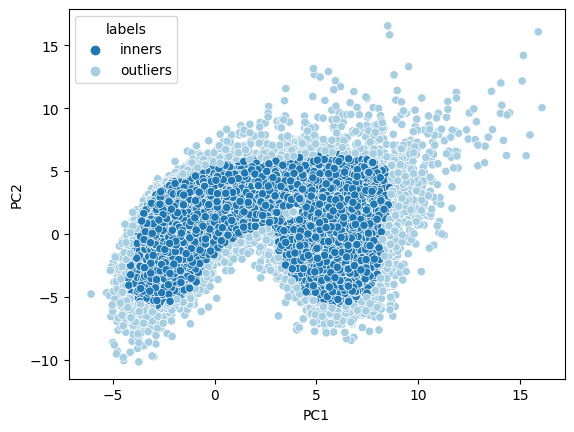

In [109]:
visualize(A[0])

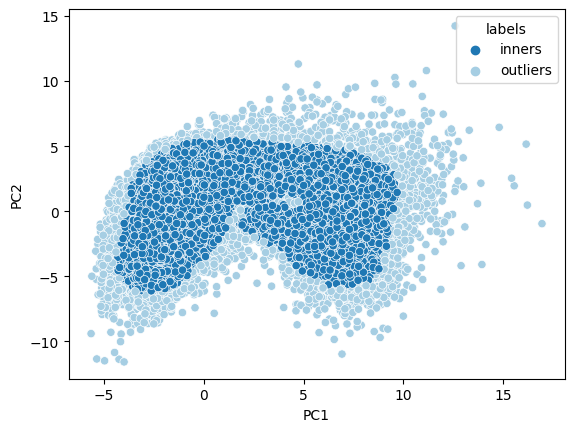

In [110]:
visualize(A[1])

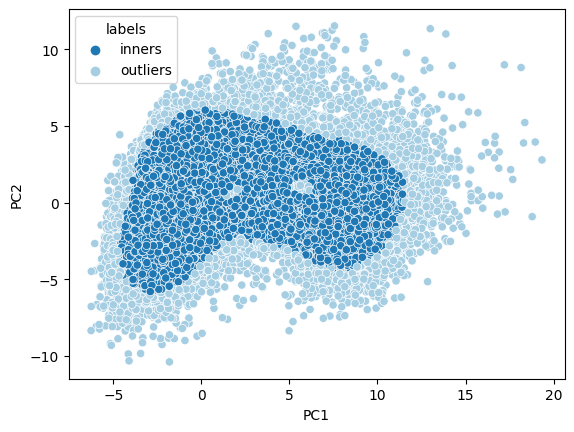

In [111]:
visualize(A[2])

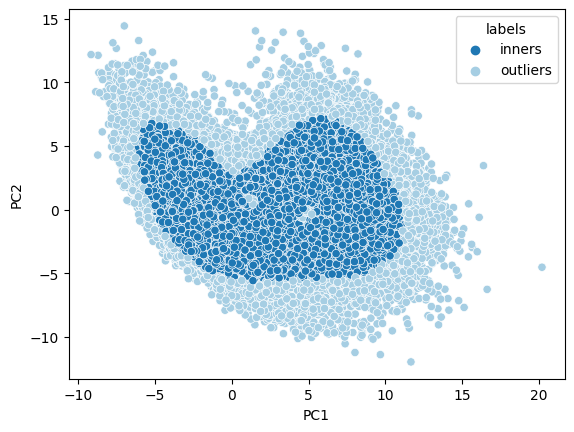

In [112]:
visualize(A[3])

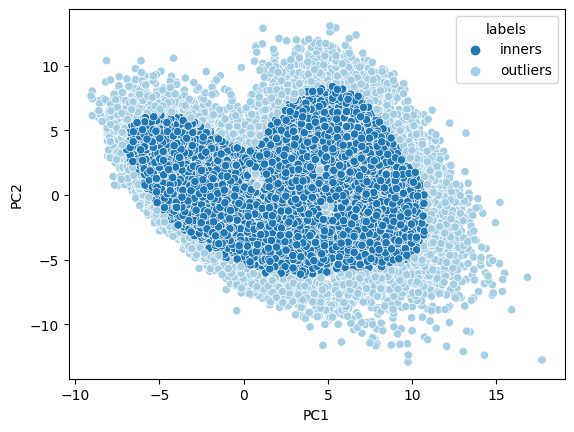

In [113]:
visualize(A[4])

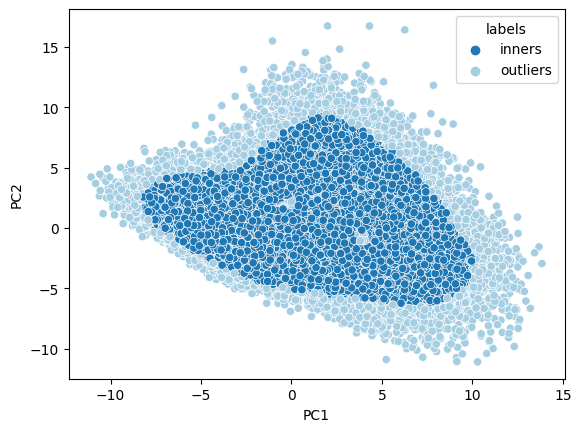

In [114]:
visualize(A[5])

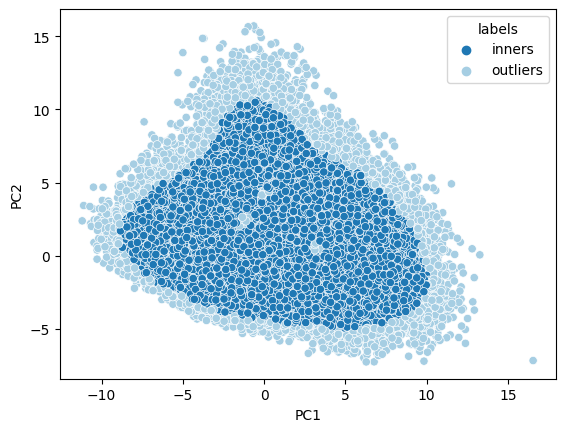

In [115]:
visualize(A[6])

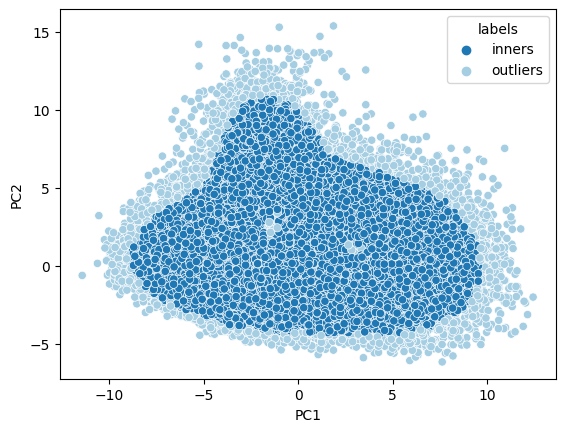

In [116]:
visualize(A[7])